Rows: 128
R [kpc]: 4.543336439888163 → 18.872320596458525
Vphi [km/s]: 216.80216802168025 → 242.81842818428188
sigma_obs [km/s]: 1.3550135501354674 → 34.95934959349593


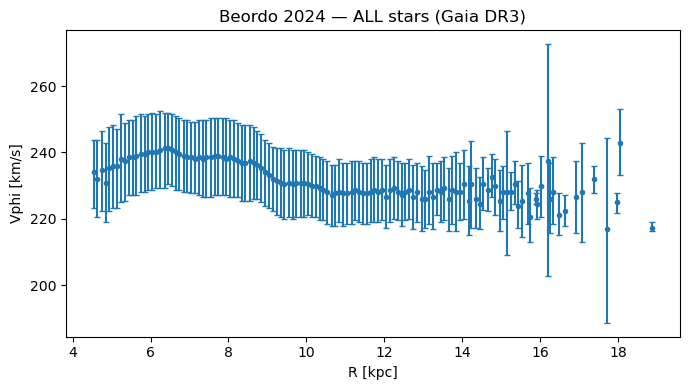

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# load
rc_path = Path("data/rotation_curve/beordo2024/beordo2024_allstars_rc.csv")
df = pd.read_csv(rc_path).sort_values("R_kpc").reset_index(drop=True)

# sigma_obs
df["sigma_obs_kms"] = 0.5*(df["eVphi_plus_kms"] + df["eVphi_minus_kms"])

# quick checks
print("Rows:", len(df))
print("R [kpc]:", df.R_kpc.min(), "→", df.R_kpc.max())
print("Vphi [km/s]:", df.Vphi_kms.min(), "→", df.Vphi_kms.max())
print("sigma_obs [km/s]:", df.sigma_obs_kms.min(), "→", df.sigma_obs_kms.max())

# plot
plt.figure(figsize=(7,4))
plt.errorbar(
    df["R_kpc"], df["Vphi_kms"],
    yerr=[df["eVphi_minus_kms"], df["eVphi_plus_kms"]],
    fmt=".", capsize=2
)
plt.xlabel("R [kpc]"); plt.ylabel("Vphi [km/s]")
plt.title("Beordo 2024 — ALL stars (Gaia DR3)")
plt.tight_layout(); plt.show()


In [2]:
ready = Path("data/rotation_curve/beordo2024/beordo2024_allstars_rc_ready.csv")
df[["R_kpc","Vphi_kms","eVphi_plus_kms","eVphi_minus_kms","sigma_obs_kms"]].to_csv(ready, index=False)
ready


PosixPath('data/rotation_curve/beordo2024/beordo2024_allstars_rc_ready.csv')